In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import LabelEncoder


In [63]:
# load data final-dataset-short.csv
df = pd.read_csv('final-dataset.csv', index_col=0)
df.head()
print(df.shape)
df.info()
# show repartition of each class (last column)
# sns.countplot(x='PKT_CLASS', data=df)
# plt.show()
# # show correlation between each column
# plt.figure(figsize=(20, 20))
# plt.show()
#cut 1 000 000 from NORMAL class 
df_tmp = df[df['PKT_CLASS'] != 'Normal']
print("OE LA SHAPE", df_tmp.shape)
df_tmp = df_tmp.append(df[df['PKT_CLASS'] == 'Normal'].iloc[:500000])
df = df_tmp

# change all columns with Dtype Object to numerical data
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.info()







(2160668, 27)
<class 'pandas.core.frame.DataFrame'>
Float64Index: 2160668 entries, 3.0 to 15.0
Data columns (total 27 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DES_ADD           float64
 1   PKT_ID            int64  
 2   FROM_NODE         int64  
 3   TO_NODE           int64  
 4   PKT_TYPE          object 
 5   PKT_SIZE          int64  
 6   FLAGS             object 
 7   FID               int64  
 8   SEQ_NUMBER        int64  
 9   NUMBER_OF_PKT     int64  
 10  NUMBER_OF_BYTE    int64  
 11  NODE_NAME_FROM    object 
 12  NODE_NAME_TO      object 
 13  PKT_IN            float64
 14  PKT_OUT           float64
 15  PKT_R             float64
 16  PKT_DELAY_NODE    float64
 17  PKT_RATE          float64
 18  BYTE_RATE         float64
 19  PKT_AVG_SIZE      float64
 20  UTILIZATION       float64
 21  PKT_DELAY         float64
 22  PKT_SEND_TIME     float64
 23  PKT_RESEVED_TIME  float64
 24  FIRST_PKT_SENT    float64
 25  LAST_PKT_RESEVED  float64
 26 

C:\Users\enzoh\AppData\Local\Temp\ipykernel_19540\1985051807.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tmp = df_tmp.append(df[df['PKT_CLASS'] == 'Normal'].iloc[:500000])


<class 'pandas.core.frame.DataFrame'>
Float64Index: 724709 entries, 24.15 to 24.1
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DES_ADD           724709 non-null  float64
 1   PKT_ID            724709 non-null  int64  
 2   FROM_NODE         724709 non-null  int64  
 3   TO_NODE           724709 non-null  int64  
 4   PKT_TYPE          724709 non-null  int32  
 5   PKT_SIZE          724709 non-null  int64  
 6   FLAGS             724709 non-null  int32  
 7   FID               724709 non-null  int64  
 8   SEQ_NUMBER        724709 non-null  int64  
 9   NUMBER_OF_PKT     724709 non-null  int64  
 10  NUMBER_OF_BYTE    724709 non-null  int64  
 11  NODE_NAME_FROM    724709 non-null  int32  
 12  NODE_NAME_TO      724709 non-null  int32  
 13  PKT_IN            724709 non-null  float64
 14  PKT_OUT           724709 non-null  float64
 15  PKT_R             724709 non-null  float64
 16  PKT_DELAY_NODE  

In [64]:
df.shape

(724709, 27)

<AxesSubplot: xlabel='PKT_CLASS', ylabel='count'>

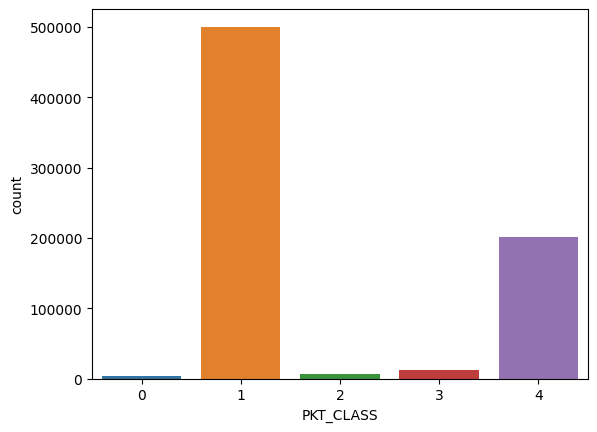

In [65]:

sns.countplot(x='PKT_CLASS', data=df)




In [67]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# encode the PKT_CLASS column
le = LabelEncoder()
y = le.fit_transform(df['PKT_CLASS'])

# make a model to predict pkt_class
#1. create a model
model = Sequential()
model.add(LSTM(128, input_shape=(df.shape[1]-1, 1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# # CNN model
# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(df.shape[1]-1, 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(5, activation='softmax'))


# 2. compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. convert the input data to float32 and fit the model
with tf.device('/GPU:0'):
    x = df.drop('PKT_CLASS', axis=1).values.astype(np.float32)
    x = x.reshape(-1, df.shape[1]-1, 1)
    model.fit(x, y, epochs=3, validation_split=0.3,batch_size=512)


Epoch 1/3
991/991 [==============================] - 84s 83ms/step - loss: 15244.4814 - accuracy: 0.5672 - val_loss: 0.8266 - val_accuracy: 1.0000
Epoch 2/3
991/991 [==============================] - 88s 89ms/step - loss: 23.7601 - accuracy: 0.6162 - val_loss: 0.5936 - val_accuracy: 1.0000
Epoch 3/3
905/991 [==========================>...] - ETA: 6s - loss: 16.6002 - accuracy: 0.5627